# Introduction to Deep Learning

Deep Learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. It's a key technology behind driverless cars, enabling them to recognize a stop sign, or distinguishing a pedestrian from a lamppost. It's the voice of your virtual assistant that answers your questions, the recommendation engines that suggest your next favorite flick, or the powerful search engines that predict what you might be looking for.

Deep Learning is a part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised, or unsupervised.

Deep Learning models are loosely modeled on the information processing patterns found in the human brain. Just as we use our brains to recognize patterns and classify different types of information, deep learning algorithms can be taught to accomplish the same tasks for machines.


### 1.1 Biological Neurons

**Understanding Biological Neurons:**

Before we jump into the intricacies of artificial neural networks, let's take a moment to appreciate the biological wonders that inspired them – the neurons in the human brain.

- **The Human Brain:** Our brains are composed of approximately 86 billion neurons. These neurons are the workhorses of our thought processes, handling everything from the most automatic reflexes to complex decision-making.

- **Structure of a Neuron:** A neuron has a cell body with dendrites and an axon. The dendrites act like input channels, receiving signals from other neurons, while the axon acts like an output channel, sending signals to other neurons.

<div style="text-align: center">

![Neuron image](assets/neuron.png)

</div>

- **Synaptic Transmission:** When a neuron receives a sufficient number of signals from its dendrites, it becomes activated and passes along an electrochemical signal through its axon. This process is known as synaptic transmission, where neurotransmitters are released into the synapse, the junction between neurons.

- **Network of Neurons:** Each neuron can form thousands of links with other neurons, creating an incredibly complex network that is capable of a vast range of functions, from basic reflexes to advanced cognitive abilities.

<div style="text-align: center">

![Neuron image](assets/brain_network.png)

</div>

**From Biology to Artificial Intelligence:**

The neural networks in Deep Learning draw inspiration from this biological setup. The idea is to create artificial "neurons" that can connect and communicate with one another, forming networks that can learn to perform tasks without being explicitly programmed to do so.

### 1.2 Single Perceptron

**The Perceptron Model:**

The perceptron is the simplest type of artificial neural network and can be considered the building block for more complex networks. It was developed in the 1950s and 1960s by the scientist Frank Rosenblatt. A perceptron mimics a single neuron with multiple input signals and one output signal, and it operates on a simple principle: it computes a weighted sum of the inputs, adds a bias, and then passes this sum through an activation function to produce an output.

<div style="text-align: center">

![Perceptron image](assets/perceptron.png)

</div>

**How a Perceptron Learns:**

1. **Weights and Bias:**
   - **Weights:** In a perceptron, every input has an associated weight that represents its relative importance. These weights are adjustable parameters that the learning algorithm will learn.
   - **Bias:** The bias is an additional parameter that allows the model to shift the activation function to the left or right, which helps the perceptron make better decisions.

2.  **Activation Function:**
    - Once the weighted sum of the inputs is computed, an activation function is applied to this sum. The simplest form of activation function is a step function that outputs a 1 if the sum is above a certain threshold and 0 otherwise.

3. **Learning Process:**
   - During the training process, the perceptron receives inputs with known outputs. It makes predictions by computing the weighted sum and applying the activation function. If the prediction is wrong, the weights and bias are updated in such a way as to reduce the error in prediction. This process is repeated for many iterations or until the model performs well.

**Linear Separability and Limitations:**

A single perceptron can only learn linearly separable patterns. Linear separability means that there exists a hyperplane that can separate the classes of data points. For instance, if you were to plot two categories of data points on a graph, a single line (or hyperplane in higher dimensions) should be able to separate them. This is a significant limitation because many real-world problems are not linearly separable.

**Hands-On Python Example Using SKLearn's Perceptron:**

Let's implement a simple perceptron using Python and SKLearn to see it in action.

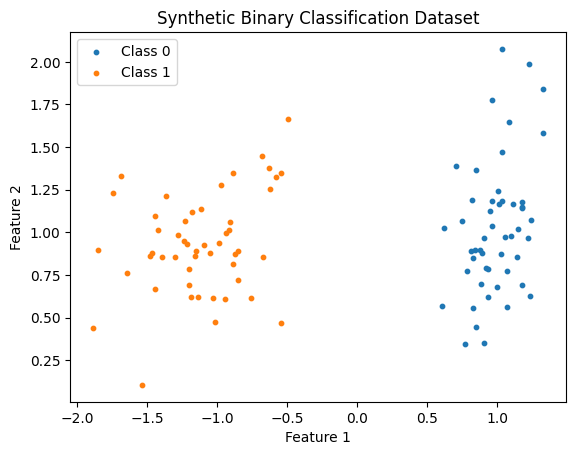

Perceptron classification accuracy: 1.00


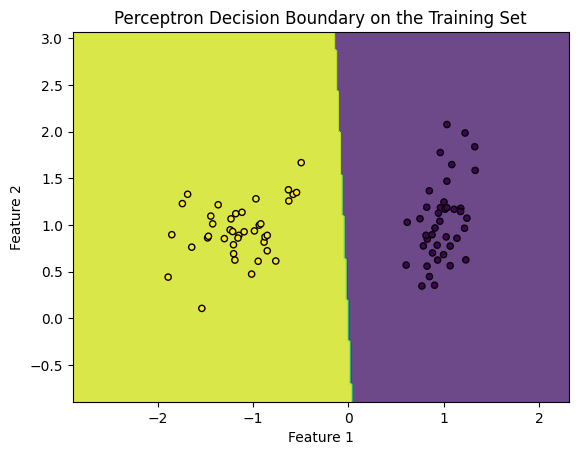

In [1]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Visualizing the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], s=10, label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=10, label='Class 1')
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=0)

# Train the perceptron
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron classification accuracy: {accuracy:.2f}')

# Plot the decision boundary
# (This will be a simplified version for illustration purposes)
import numpy as np

# Set min and max values and give it some padding
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the function value for the whole grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', s=20)
plt.title("Perceptron Decision Boundary on the Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


The publication of the book "Perceptrons" by Marvin Minsky and Seymour Papert in 1969 pointed out that perceptrons are incapable of solving some simple problems - in particular, a simple perceptron cannot not solve the "XOR" problem.  This led to a temporary decline in the popularity and funding of neural network research. However, the advent of MLPs and backpropagation brought about a resurgence in the field, leading to the deep learning revolution we are witnessing today.


### 1.3 Multilayer Perceptron (MLP)

**The Architecture of MLPs:**

Multilayer Perceptrons (MLPs), also known as feedforward neural networks, are a class of deep neural networks with one or more hidden layers between the input and output layers. Each layer is made up of a number of interconnected nodes or neurons, and each connection has a weight associated with it.

- **Input Layer:** The first layer that receives the input signal to be processed.
- **Hidden Layers:** One or more layers where the actual processing is done via a system of weighted connections. The number of hidden layers and the number of neurons in each hidden layer are parameters that can be adjusted depending on the complexity of the task.
- **Output Layer:** The final layer that produces the output of the network.

<div style="text-align:center">

![MLP](assets/mlp.png)

<div>



**Gradient Descent:**

Gradient Descent is the optimization algorithm used to minimize the cost function, which is a measure of how far off the network's predictions are from the actual values. The process involves:

- **Cost Function:** A function (like Mean Squared Error for regression tasks) that measures the difference between the predicted values by the network and the true values.
- **Learning Rate:** A hyperparameter that determines the size of the steps we take to reach a (local) minimum.
- **Update Rule:** A rule to adjust the weights of the network in the opposite direction of the gradient of the cost function with respect to the weights.



**Hands-on Exercise with Gradient Descent**

A useful way to understand gradient descent is to start with a known error function.  Imagine that we have a quadratic error function such as $f(x) = x^2$.  The gradient of this error function is just the first derivative of the function $f(x)$.  Using this, finish the following code to calculate the gradient.  After you've done that, try manipulating the learning rate.  What happens?



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function and Derivative
f = lambda x: x ** 2
df =  #??? What is the derivative?

# Gradient Descent
def gradient_descent(starting_x, learning_rate, n_iter=10):
    x_path = [starting_x] # x_path is an array that stores our successive "guesses".  
    for _ in range(n_iter):
        gradient = df(x_path[-1]) #We are applying the gradient function (dervative) evaluated at our last guess
        new_x = #what goes here?
        x_path.append(new_x)
    return x_path

# Parameters
starting_x = 9
learning_rate = .1
n_iter = 20

# Run Gradient Descent
x_path = gradient_descent(starting_x, learning_rate, n_iter)

# Plotting
x = np.linspace(-10, 10, 100)
y = f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = x^2')

# Plot the steps with lines connecting them
for i in range(1, len(x_path)):
    plt.scatter(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')
    plt.plot(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')

plt.title('Gradient Descent Visualization with Paths')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


SyntaxError: invalid syntax (1822046701.py, line 6)

In the following, consider the the function $f(x) = (x-2)^4$.  Complete the code and examine the process of gradient decent.  What do you notice?  How many iterations do you need to find the minimum?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function and Derivative
f = lambda x: (x - 2) ** 4
df = # What's the derivative?

# Gradient Descent
def gradient_descent(starting_x, learning_rate, n_iter=10):
    x_path = [starting_x]
    for _ in range(n_iter):
        gradient = df(x_path[-1])
        new_x = #what goes here?
        x_path.append(new_x)
        
    return x_path

# Parameters
starting_x = 3  
learning_rate = .1  
n_iter = 100

# Run Gradient Descent
x_path = gradient_descent(starting_x, learning_rate, n_iter)

# Plotting
x = np.linspace(1, 3, 1000)  # Range includes the minimum and starting point
y = f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = (x - 2)^4')

# Plot the steps with lines connecting them
for i in range(1, len(x_path)):
    plt.scatter(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')
    plt.plot(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')

plt.title('Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()





**Backpropagation:**

In the real-world application of neural networks, we don't have an explicit formula for the loss function like $f(x) = x^2$. Instead, the loss function is determined by the architecture of the neural network, the weights of the connections, the biases, the choice of activation functions, and the dataset being used.

Backpropagation is the central mechanism by which neural networks calculate and follow the gradient during the learning process. It involves:

1. **Forward Pass:**
   - Data is passed through the network (forward pass), and a prediction is made.
   - The loss function is evaluated using the predicted output and the true labels.

2. **Backpropagation:**
   - Backpropagation is then used to calculate the gradients of the loss function with respect to each weight in the network.
   - Even though we don't have a simple formula for the loss as in $f(x) = x^2$, we know that the loss is a function of the weights and biases in the network, and we can compute its gradient using the chain rule of calculus.

3. **Chain Rule:**
   - The chain rule is applied recursively from the output layer back to the input layer, hence the name "backpropagation".
   - The derivative of the loss function with respect to a weight is calculated by considering how a change in that weight affects the loss.

4. **Computing Derivatives:**
   - Even though we don't have an explicit formula for the loss, we can calculate the derivative of the loss with respect to each parameter using automatic differentiation tools that are built into deep learning frameworks like TensorFlow and PyTorch.
   - These tools allow us to compute the gradient of the loss with respect to all the weights without manually deriving the gradient functions.

5. **Gradient Descent:**
   - With the gradients calculated, we can perform a gradient descent step to update the weights in the direction that will most reduce the loss.
   - This process is repeated for many iterations over the training dataset, progressively reducing the loss and improving the model's predictions.

Thus, while we may not have an explicit mathematical function for the loss in neural networks, the process of backpropagation allows us to compute the necessary gradients to perform gradient descent. This is why neural networks are so powerful—they can learn to minimize loss even when the relationship between parameters and loss is highly complex and not explicitly defined.

**Activation Functions:**

Activation functions play a crucial role in neural networks by introducing non-linear properties to the model. Without non-linearity, no matter how many layers the neural network has, it would behave just like a single-layer perceptron, which can only solve linearly separable problems. 

1. **Linear Limitations:**
   - If a neural network used only linear transformations (i.e., without any activation functions or with only linear activation functions), the entire network would be equivalent to a single linear transformation. This is because linear transformations can be composed; that is, the combination of two linear transformations is itself a linear transformation.
   - This compounded linear transformation would not be able to capture the complex relationships in data that are non-linear in nature.

2. **Stacking Layers:**
   - The key idea behind deep learning is to process data through multiple layers where each layer's output is fed into the next layer. The complexity and capability of the model grow with each layer, allowing it to learn a hierarchy of features.
   - Without activation functions, adding more layers wouldn't increase the network's hypothesis space beyond that of a single layer. The additional layers would offer no new capability because the output of the network would still be a linear function of the input.

3. **Why Non-Linearity Matters:**
   - Most real-world data cannot be explained by a linear model; complexities and patterns are typically non-linear.
   - Non-linear activation functions allow neural networks to compute arbitrarily complex functions. By using non-linear transformations, a neural network can learn to approximate non-linear relationships between inputs and outputs, which is essential for tasks like image and speech recognition, natural language processing, and many others.

4. **Universal Approximation Theorem:**
   - The Universal Approximation Theorem states that a feedforward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of $\mathbb{R}^n$, under mild assumptions on the activation function. The activation function must be non-linear for this to hold true.
   - This means that theoretically, neural networks can learn to represent a wide variety of functions given enough neurons and the right non-linear activation function.

**Common activation functions**

- **Heavyside**  A simple step function that returns a 1 if the input is greater than or equal to a threshold, and 0 otherwise.
- **Sigmoid:** It squashes the input values into a range between 0 and 1. It's often used for the output layer in binary classification problems.
- **Tanh** The hyberbolic tangent, which is effectively a scaled version of the sigmoid.  A key different is that it returns a value between -1 and 1, rather than 0 or 1.
- **ReLU (Rectified Linear Unit):** It outputs the input directly if it is positive, otherwise, it outputs zero. It has become the default activation function for many types of neural networks because it allows for faster training.

**Practical Implications**

1. **Breaking Symmetry:**
   - During training, if two neurons have the same input and activation function, they would always update the same way. Non-linear activation functions help to break this symmetry.

2. **Vanishing and Exploding Gradients:**
   - While activation functions are necessary for neural networks to model complex data, the choice of function can affect training dynamics. For example, sigmoid or tanh can lead to vanishing gradients, making training deep networks difficult.

3. **ReLU and Variants:**
   - To address some of these training issues, functions like ReLU (Rectified Linear Unit) and its variants (Leaky ReLU, Parametric ReLU, etc.) have become popular. ReLU is piecewise linear but non-linear overall because it introduces a point of non-differentiability at 0.

4. **Computational Efficiency:**
   - Some non-linear functions, like ReLU, are also computationally efficient, which can significantly speed up training without sacrificing the ability to represent non-linear functions.

In conclusion, activation functions allow neural networks to map complex and non-linear hypotheses. Without them, deep learning would not be able to achieve the impressive results it does on a vast array of tasks that involve understanding and processing data with intricate, non-linear relationships.





In [ ]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()



**Hands-On Example with SKLearn's MLPClassifier:**

Let's now see how to implement an MLP with sklearn's MLPClassifier.  Note that it is possible to use an MLP both as a regressor and as a classifier, but there are few considerations when using network as a classifier.

When designing a neural network for a classification task, the architecture, including how you set up the output layer and choose the loss function, is crucial to the network's performance. Here's how these components are typically configured in the context of `sklearn`'s `MLPClassifier`:

### Output Layer Configuration

1. **Binary Classification:**
   - For binary classification problems, where the goal is to distinguish between two classes, the output layer typically consists of a single neuron.
   - The output neuron usually has a sigmoid activation function that squashes the input value into a range between 0 and 1, representing the probability of the input being in one of the two classes.
   - A threshold is then applied to this probability to make a discrete prediction; for example, if the output is greater than 0.5, the input is assigned to one class, otherwise to the other class.

2. **Multiclass Classification:**
   - For multiclass classification problems, where there are more than two classes, the output layer has as many neurons as there are classes.
   - The softmax function is often used in this case. It is a generalization of the sigmoid function that can handle multiple classes. It converts the output of the last hidden layer into probability distributions over predicted output classes.
   - Each neuron in the output layer corresponds to a class, and the softmax function ensures that the sum of the probabilities of all output neurons equals 1.

<div class="warning"  style='padding:1em; background-color:#f5deae; margin:1em;>

**The Softmax Function**

For a given vector $ \mathbf{z} $ of raw scores for each class, the softmax function $ \sigma $ is defined as:

$$ \sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

where:
- $ i $ is the index of a particular element of the output vector $ \mathbf{z} $,
- $ K $ is the total number of classes,
- $ e $ is the base of the natural logarithm,
- $ e^{z_i} $ is the exponential of the score for class $ i $,
- $ \sum_{j=1}^{K} e^{z_j} $ is the sum of the exponentials of all the scores.

The output of the softmax function for each element $ \sigma(\mathbf{z})_i $ is a probability that the input belongs to class $ i $, given the raw scores in $ \mathbf{z} $. The sum of all the probabilities from the softmax function will equal 1.

</div>


<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>


**The Softmax Function**

For a given vector $ \mathbf{z} $ of raw scores for each class, the softmax function $ \sigma $ is defined as:

$$ \sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

where:
- $ i $ is the index of a particular element of the output vector $ \mathbf{z} $,
- $ K $ is the total number of classes,
- $ e $ is the base of the natural logarithm,
- $ e^{z_i} $ is the exponential of the score for class $ i $,
- $ \sum_{j=1}^{K} e^{z_j} $ is the sum of the exponentials of all the scores.

The output of the softmax function for each element $ \sigma(\mathbf{z})_i $ is a probability that the input belongs to class $ i $, given the raw scores in $ \mathbf{z} $. The sum of all the probabilities from the softmax function will equal 1.

</div>

### Exercise: Implementing Softmax Function

Using the above definition, can you implement your own version of the softmax function?  If you do it right, your output should look something like:

```
Probabilities: [0.65900114 0.24243297 0.09856589]
Sum of probabilities: 1.0
```


In [ ]:
import numpy as np # You'll need to use numpy.  Look at the docs if you need to figure out how to exponentiate things
# Define the softmax function here

def softmax(logits):
    pass # replace this with the actual implementation
    # Hint: Often, it's useful here to subtract the max for numerical stability

In [ ]:
# Run this cell to test

# Example logits (raw scores) for 3 classes
logits = np.array([2.0, 1.0, 0.1])

# Apply softmax to convert logits to probabilities
probabilities = softmax(logits)

print(f"Probabilities: {probabilities}")
print(f"Sum of probabilities: {np.sum(probabilities)}")



### Loss Function Selection

1. **Binary Cross-Entropy:**
   - For binary classification, the binary cross-entropy (also known as log loss) is typically used. It measures the performance of a classification model whose output is a probability value between 0 and 1.
   - Binary cross-entropy loss is ideal for binary classification as it penalizes false classifications with a logarithmic penalty.

2. **Categorical Cross-Entropy:**
   - In multiclass classification problems, categorical cross-entropy (or softmax loss) is used. It measures the performance of a model where the prediction is a probability distribution across different outputs.
   - This loss function is appropriate for multiclass classification problems where only one result is the correct classification.


<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>


**Categorical Cross Entropy Loss Function**

The categorical cross-entropy loss function is commonly used in multi-class classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1. The loss increases as the predicted probability diverges from the actual label. For a single data point, the categorical cross-entropy loss is given by:

$$ L_i = - \sum_{j=1}^{K} y_{ij} \log(p_{ij}) $$

where:
- $ L_i $ is the loss for the $ i $-th observation.
- $ K $ is the number of classes.
- $ y_{ij} $ is a binary indicator of whether class $ j $ is the correct classification for observation $ i $.
- $ p_{ij} $ is the predicted probability that observation $ i $ is of class $ j $.

The total loss over a dataset of $ N $ observations is the average of $ L_i $ for all observations:

$$ L = \frac{1}{N} \sum_{i=1}^{N} L_i $$



### Exercise: Implementing Categorical Cross-Entropy

Using the above, try to implement the categorical cross-entropy function.  If you're right, you should get output that looks like:

```
Losses: [0.35667494 0.22314355 0.51082562]
Average Loss: 0.3635480359261127
```

Implement your function below:

In [ ]:

import numpy as np

def categorical_crossentropy(y_true, y_pred):
    # Note that 'y_true' is a one-hot encoded array of the true class
    # y_pred is a list of probabilities
    # Clip predictions to avoid log(0) error. Clip both sides to not favour any class.
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    # Compute the cross-entropy
    pass # Replace this line!
 

Run the following to test your code...

In [ ]:
   
# Example true labels and predictions for a 3-class classification
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # One-hot encoded true labels
y_pred = np.array([[0.7, 0.2, 0.1], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]])  # Predicted probabilities

# Calculate loss for each observation
losses = np.array([categorical_crossentropy(y_true[i], y_pred[i]) for i in range(len(y_true))])

# Calculate average loss
average_loss = np.mean(losses)

print(f"Losses: {losses}")
print(f"Average Loss: {average_loss}")

***Note***

- In the preceding, we used `np.clip` to prevent taking the logarithm of 0, which would result in `-inf`. This also prevents taking the logarithm of a number very close to 1, which could lead to numerical instability. The clipping limits are set very close to 0 and 1 (but not exactly 0 or 1) to prevent these issues.

This average loss value is the one that would be minimized during the training of a multi-class classification model using an optimization algorithm like gradient descent.


### Practical Implementation with MLPClassifier

In `sklearn`'s `MLPClassifier`, you don't have to manually specify the activation function for the output layer or the loss function; this is handled automatically based on the labels provided to the classifier during training:

- If you fit the `MLPClassifier` with a binary label (e.g., `[0, 1, 1, 0]`), it will internally configure its output layer with one neuron and use binary cross-entropy as the loss function.
- If you provide labels for a multiclass problem (e.g., `[0, 2, 1, 2]` for three classes), it will set up the output layer with one neuron per class and use categorical cross-entropy.

When you initialize the `MLPClassifier`, you have the option to specify parameters like `hidden_layer_sizes`, which determines the size and the number of hidden layers, and `activation`, which allows you to choose the activation function for the hidden layers (e.g., `relu`, `tanh`).

Here's a brief code snippet showing how you might initialize an `MLPClassifier` for a binary classification problem:

```python
from sklearn.neural_network import MLPClassifier

# For a binary classification problem
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
```

And for a multiclass problem:

```python
from sklearn.neural_network import MLPClassifier

# For a multiclass classification problem
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=200)
```

In both cases, `sklearn` automatically takes care of setting up the output layer and loss function appropriately based on the data you provide when calling the `fit` method. The `solver` parameter specifies the optimization algorithm to use for weight optimization, where 'adam' is usually a good default choice, but you might also try 'sgd'.  We'll talk more about the different solvers later.

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=4, random_state=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                    solver='sgd', activation="logistic", verbose=10, random_state=1,
                    learning_rate_init=.1)

# Train the MLP
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Iteration 1, loss = 1.41382874
Iteration 2, loss = 1.31912205
Iteration 3, loss = 1.23575970
Iteration 4, loss = 1.15366944
Iteration 5, loss = 1.09093918
Iteration 6, loss = 1.04342010
Iteration 7, loss = 1.01232889
Iteration 8, loss = 0.98977649
Iteration 9, loss = 0.97478748
Iteration 10, loss = 0.97178588
Iteration 11, loss = 0.96143184
Iteration 12, loss = 0.95640255
Iteration 13, loss = 0.94859808
Iteration 14, loss = 0.94494192
Iteration 15, loss = 0.93921187
Iteration 16, loss = 0.93261986
Iteration 17, loss = 0.92823424
Iteration 18, loss = 0.92322067
Iteration 19, loss = 0.91500295
Iteration 20, loss = 0.90941454
Iteration 21, loss = 0.90283039
Iteration 22, loss = 0.89398323
Iteration 23, loss = 0.88590596
Iteration 24, loss = 0.88074548
Iteration 25, loss = 0.87126033
Iteration 26, loss = 0.86412598
Iteration 27, loss = 0.85483744
Iteration 28, loss = 0.84547082
Iteration 29, loss = 0.83799809
Iteration 30, loss = 0.82705593
Iteration 31, loss = 0.81873674
Iteration 32, los